## US Baby Names  1880 - 2010 Data Set

https://www.ssa.gov/oact/babynames/background.html

History

In 1998, the Social Security Administration published Actuarial Note #139, Name Distributions in the Social Security Area, August 1997, on the distribution of given names of Social Security number holders. The note, written by actuary Michael W. Shackleford, gave birth to the present website.
Data Source

All names are from Social Security card applications for births that occurred in the United States after 1879. Note that many people born before 1937 never applied for a Social Security card, so their names are not included in our data. For others who did apply, our records may not show the place of birth, and again their names are not included in our data.
All data are from a 100% sample of our records on Social Security card applications as of March 2022.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

In [2]:
df = pd.read_csv("yob1880.txt", names = ["name", "sex", "births"])

In [3]:
df.head(5)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746


In [4]:
## The sum of the births by sex 
df.groupby("sex")["births"].sum()

sex
F     90994
M    110490
Name: births, dtype: int64

In [5]:
## Concatenate all year values into a single data frame

years= range(1880, 2011)
pieces = []
columns = ["name", "sex", "births"]
for year in years:
    path = "yob%d.txt" % year
    frame = pd.read_csv(path, names = columns)
    
    frame["year"] = year
    pieces.append(frame)

In [6]:
df = pd.concat(pieces, ignore_index=True)
df.head(5)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [7]:
df.year.value_counts()

2008    35088
2007    34965
2009    34722
2006    34097
2010    34089
2005    32556
2004    32055
2003    31191
2002    30568
2001    30281
2000    29776
1999    28555
1998    27907
1997    26972
1996    26424
1995    26080
1994    25998
1993    25967
1992    25428
1991    25115
1990    24717
1989    23775
1988    22372
1987    21411
1986    20660
1985    20091
1982    19700
1984    19510
1981    19483
1980    19457
1983    19412
1979    19043
1978    18234
1977    18183
1976    17400
1975    16950
1974    16249
1973    15686
1972    15416
1971    15298
1970    14782
1969    13751
1968    12938
1967    12404
1964    12397
1963    12286
1962    12214
1961    12185
1966    12159
1965    11955
1960    11925
1959    11766
1957    11567
1958    11529
1956    11344
1955    11127
1954    10984
1924    10870
1921    10855
1953    10837
1922    10756
1920    10756
1952    10646
1923    10643
1925    10638
1951    10467
1926    10459
1927    10404
1918    10398
1947    10371
1919    10369
1950  

In [8]:
df

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1692391,Zymaire,M,5,2010
1692392,Zyonne,M,5,2010
1692393,Zyquarius,M,5,2010
1692394,Zyran,M,5,2010


In [9]:
df.value_counts()

name     sex  births  year
Aaban    M    5       2007    1
Meloney  F    27      1974    1
Meloni   F    5       1989    1
                      1986    1
                      1961    1
                             ..
Frances  F    1975    1897    1
              1964    1896    1
              1869    1967    1
              1833    1895    1
Zzyzx    M    5       2010    1
Length: 1692396, dtype: int64

In [10]:
## Aggregating data via pivot_table. df2 represents total births.

df2 = df.pivot_table("births", index = "year", columns = "sex", aggfunc= sum)
df2

sex,F,M
year,,
1880,90994,110490
1881,91953,100737
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110784
1887,145982,101411
1888,178622,120851


<Figure size 800x600 with 0 Axes>

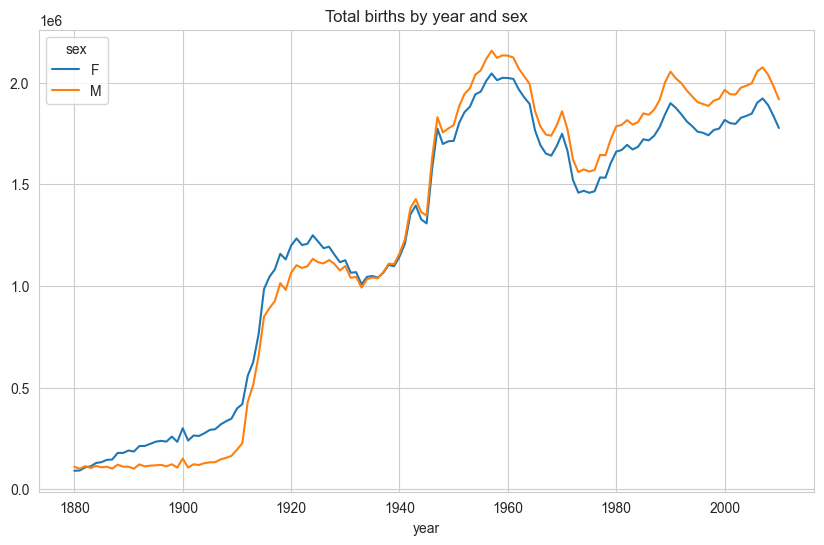

In [11]:
plt.figure(figsize=(8,6))
df2.plot(title = "Total births by year and sex");

Let’s insert a column prop with the fraction of babies given each name relative to
the total number of births. A prop value of 0.02 would indicate that 2 out of every 100
babies was given a particular name. Thus, we group the data by year and sex, then add
the new column to each group:

In [12]:
def add_prop(group) :
    births = group.births.astype("float")
    group["prop"] = births / births.sum()
    return group
df = df.groupby(["year", "sex"]).apply(add_prop)

In [13]:
df.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F     1.000
      M     1.000
1881  F     1.000
      M     1.000
1882  F     1.000
      M     1.000
1883  F     1.000
      M     1.000
1884  F     1.000
      M     1.000
1885  F     1.000
      M     1.000
1886  F     1.000
      M     1.000
1887  F     1.000
      M     1.000
1888  F     1.000
      M     1.000
1889  F     1.000
      M     1.000
1890  F     1.000
      M     1.000
1891  F     1.000
      M     1.000
1892  F     1.000
      M     1.000
1893  F     1.000
      M     1.000
1894  F     1.000
      M     1.000
1895  F     1.000
      M     1.000
1896  F     1.000
      M     1.000
1897  F     1.000
      M     1.000
1898  F     1.000
      M     1.000
1899  F     1.000
      M     1.000
1900  F     1.000
      M     1.000
1901  F     1.000
      M     1.000
1902  F     1.000
      M     1.000
1903  F     1.000
      M     1.000
1904  F     1.000
      M     1.000
1905  F     1.000
      M     1.000
1906  F     1.000
      M     1.000
1907  F     1.000


##extract a subset of the data to facilitate further analysis: the top 1000 names for each sex/year combination:

def get_top1000(group): 
    return group.sort_values(by='births', ascending=False)[:1000]
grouped = df.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
df.reset_index(inplace=True, drop=True)

In [14]:
## Alternative method



pieces = []
for year, group in df.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
df = pd.concat(pieces, ignore_index=True)

In [15]:
df.head(5)

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.078
1,Anna,F,2604,1880,0.029
2,Emma,F,2003,1880,0.022
3,Elizabeth,F,1939,1880,0.021
4,Minnie,F,1746,1880,0.019


## Measuring the increase in naming diversity

In [16]:
table = df.pivot_table('prop', index='year', columns='sex', aggfunc=sum)

<AxesSubplot: title={'center': 'Sum of table1000.prop by year and sex'}, xlabel='year'>

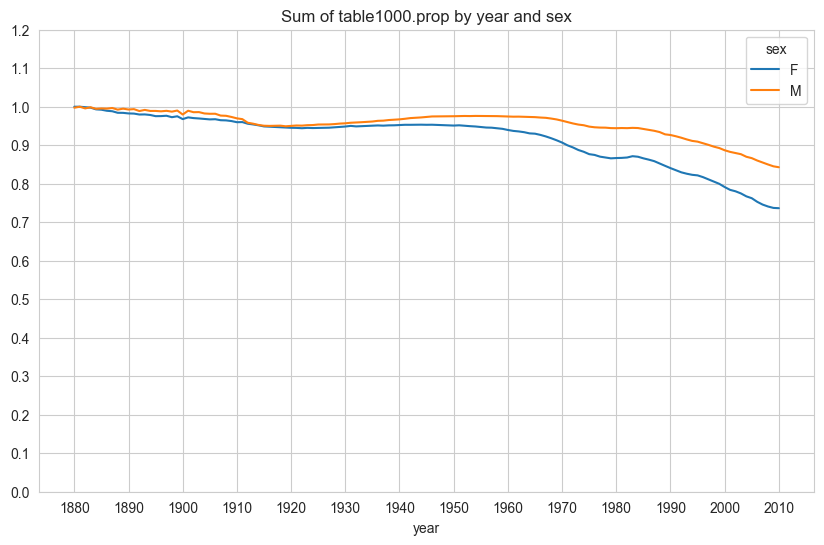

In [18]:
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [20]:
boys = df[df.sex == 'M']
girls = df[df.sex == 'F']

In [22]:
df1 = boys[boys.year == 2010]
df1

,name,sex,births,year,prop
260876,Jacob,M,22139,2010,0.012
260877,Ethan,M,18008,2010,0.009
260878,Michael,M,17366,2010,0.009
260879,Jayden,M,17191,2010,0.009
260880,William,M,17060,2010,0.009
260881,Alexander,M,16759,2010,0.009
260882,Noah,M,16463,2010,0.009
260883,Daniel,M,15853,2010,0.008
260884,Aiden,M,15544,2010,0.008
260885,Anthony,M,15501,2010,0.008


In [24]:
prop_cumsum = df1.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260876   0.012
260877   0.021
260878   0.030
260879   0.039
260880   0.048
260881   0.057
260882   0.065
260883   0.073
260884   0.082
260885   0.090
Name: prop, dtype: float64

In [25]:
prop_cumsum.values.searchsorted(0.5)
##he cumulative sum at which 0.5 would need to be inserted to keep it in sorted order

116

In [28]:
##each year/sex combination, groupby those fields,and apply a function returning the count for each group

def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = df.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [29]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot: title={'center': 'Number of popular names in top %50'}, xlabel='year'>

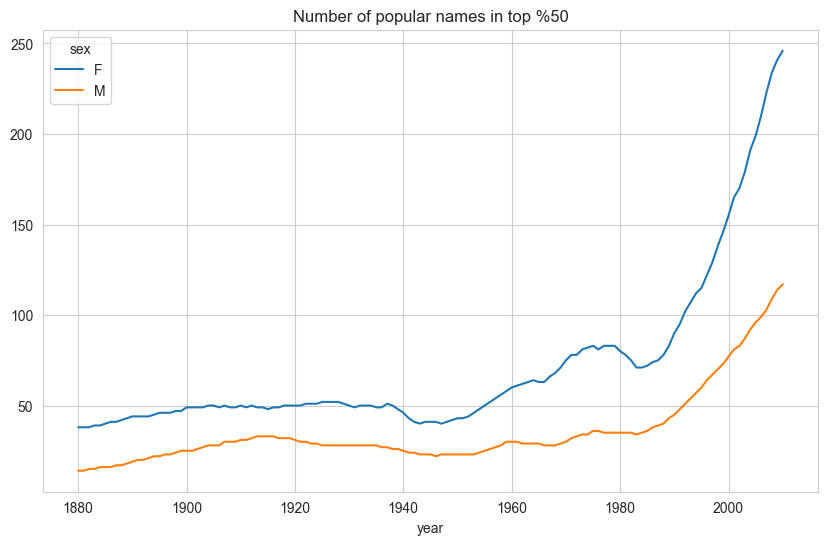

In [30]:
diversity.plot(title = "Number of popular names in top %50")

Conclusion : As you can see, girl names have always been more diverse than boy names, and they
have only become more so over time. Further analysis of what exactly is driving the
diversity, like the increase of alternative spellings, is left to the reader.

## The last letter revolution

In 2007, baby name researcher Laura Wattenberg pointed out on her website that the
distribution of boy names by final letter has changed significantly over the last 100
years. To see this, we first aggregate all of the births in the full dataset by year, sex, and
final letter:

In [31]:
get_last_letter = lambda x : x[-1]
last_letters = df.name.map(get_last_letter)
last_letters.name = "last_letter"

In [32]:
table = df.pivot_table("births", index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [33]:
##Then we select out three representative years spanning the history and print the first few rows:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')

In [34]:
subtable.head(5)

sex                  F                               M                      
year              1910       1960       2010      1910       1960       2010
last_letter                                                                 
a           101547.000 643521.000 508702.000   698.000   3519.000  21185.000
b                  NaN    694.000        NaN   391.000   3695.000  37376.000
c                  NaN        NaN    805.000   444.000  15206.000  21171.000
d             6438.000   2693.000   1140.000 21630.000 258717.000  36222.000
e           128755.000 402481.000 238652.000 27545.000 170922.000 106344.000

In [35]:
letter_prop = subtable / subtable.sum()

<AxesSubplot: title={'center': 'Female'}, xlabel='last_letter'>

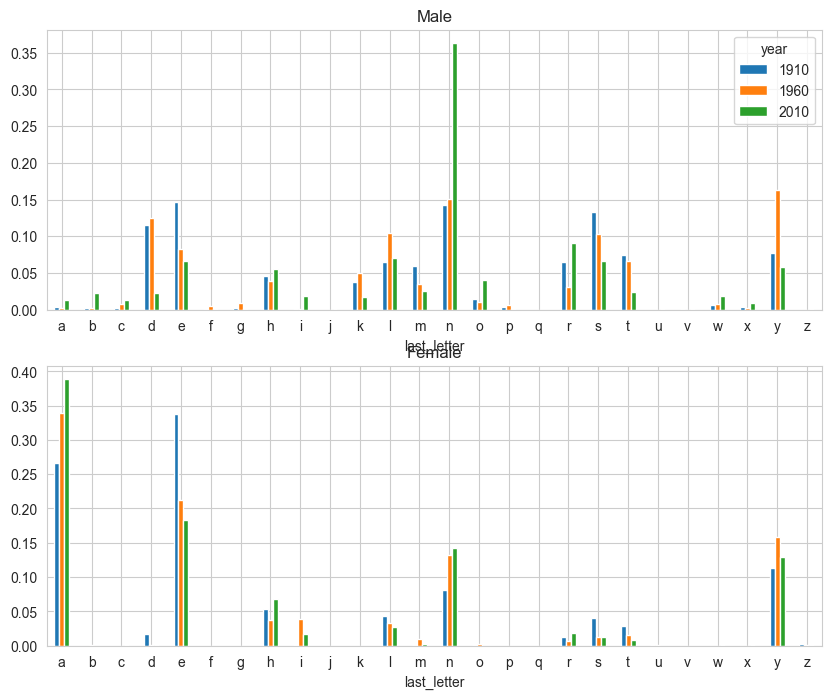

In [36]:

##Proportion of boy and girl names ending in each letter
fig, axes = plt.subplots(2, 1, figsize = (10,8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
legend=False)

In [38]:
letter_prop = table / table.sum().astype("float")
dny_ts = letter_prop.loc[["d", "n", "y"], "M"].T

In [39]:
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083,0.153,0.076
1881,0.083,0.153,0.077
1882,0.085,0.150,0.077
1883,0.084,0.152,0.079
1884,0.086,0.150,0.080


<AxesSubplot: xlabel='year'>

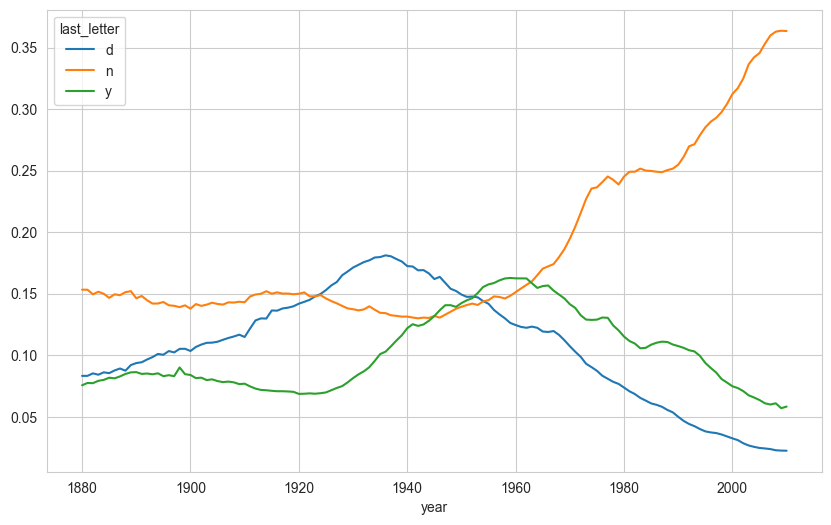

In [40]:
##Proportion of boys born with names ending in d/n/y over time:
dny_ts.plot()

## Boy names become girl names(and vice versa)

In [44]:
all_names = pd.Series(df.name.unique())

In [46]:
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2293    Lesley
4263    Leslee
4731     Lesli
6106     Lesly
dtype: object

In [48]:
filtered = df[df.name.isin(lesley_like)]
filtered.groupby("name").births.sum()

name
Leslee      1082
Lesley     35038
Lesli        929
Leslie    370581
Lesly      10072
Name: births, dtype: int64

In [49]:
table = filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')

In [50]:
table = table.div(table.sum(1), axis = 0)

In [51]:
table.tail()

sex,F,M
year,,
2006,1.000,NaN
2007,1.000,NaN
2008,1.000,NaN
2009,1.000,NaN
2010,1.000,NaN


<AxesSubplot: xlabel='year'>

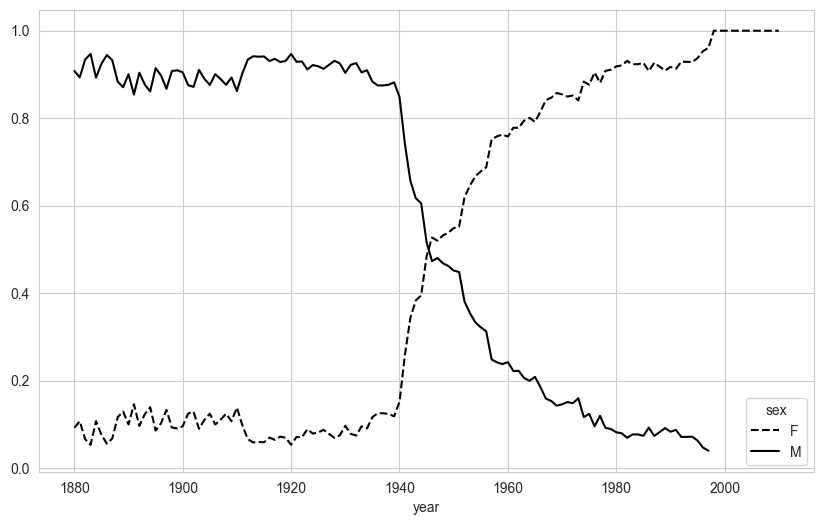

In [52]:
##Proportion of male/female Lesley-like names over time

table.plot(style={'M': 'k-', 'F': 'k--'})